In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("datafile (1).csv")

In [5]:
df.head(10)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


# EDA

In [17]:
df.shape

(49, 6)

In [18]:
df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

### Categorical Features

In [15]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=="O"]
categorical_features

['Crop', 'State']

In [23]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature,len(df[feature].unique())))

The feature is Crop and number of categories are 10
The feature is State and number of categories are 13


In [21]:
df.Crop.unique()

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

In [22]:
df.State.unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

### Numerical Features

In [16]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!="O"]
numerical_features

['Cost of Cultivation (`/Hectare) A2+FL',
 'Cost of Cultivation (`/Hectare) C2',
 'Cost of Production (`/Quintal) C2',
 'Yield (Quintal/ Hectare) ']

In [41]:
cols=df.columns

In [42]:
state_sum=df.groupby("State").sum()
state_sum.sort_values(by="State")

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
State,,,,
Andhra Pradesh,200500.69,315029.07,14273.65,915.41
Bihar,13513.92,19857.70,404.43,42.95
Gujarat,79776.83,110820.34,7606.88,53.70
Haryana,44634.24,71525.72,3378.47,39.84
Karnataka,100129.18,149148.83,12102.17,1030.81
Madhya Pradesh,30954.72,57068.85,3641.79,46.82
Maharashtra,148360.96,210923.27,13169.10,789.50
Orissa,22961.59,34176.03,3329.18,35.43
Punjab,72147.43,131543.55,3478.42,131.63


In [43]:
crop_sum=df.groupby(["Crop"]).sum()
crop_sum.sort_values("Crop")

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
Crop,,,,
ARHAR,68038.23,108599.23,12458.65,42.03
COTTON,141434.37,214790.99,11359.83,93.86
GRAM,58597.55,96543.87,8963.00,52.79
GROUNDNUT,106413.91,140940.38,13523.19,51.44
MAIZE,83050.75,119186.49,3872.83,153.99
MOONG,35593.35,53881.98,14950.50,20.98
PADDY,114050.70,178841.11,3638.67,231.48
RAPESEED AND MUSTARD,61302.45,106117.16,7077.97,71.60
SUGARCANE,260823.58,398275.13,493.24,3952.48


In [44]:
total_sum=df.groupby(["State","Crop"]).sum()
total_sum.sort_values("State")

Cost of Cultivation (`/Hectare) A2+FL  \
State          Crop                                                          
Andhra Pradesh ARHAR                                              17051.66   
               COTTON                                             29140.77   
               GRAM                                               14421.98   
               GROUNDNUT                                          21229.01   
               MAIZE                                              25687.09   
               MOONG                                               6684.18   
               PADDY                                              29664.84   
               SUGARCANE                                          56621.16   
Bihar          MAIZE                                              13513.92   
Gujarat        GROUNDNUT                                          22951.28   
               RAPESEED AND MUSTARD                               13740.64   
               ARHAR                                              13468.82   
               COTTON                                             29616.09   
Haryana        COTTON                                             29918.97   
               RAPESEED AND MUSTARD                               14715.27   
Karnataka      ARHAR                                              10593.15   
               GROUNDNUT                                          13647.10   
               MAIZE                                              13792.85   
               MOONG                                               6440.64   
               SUGARCANE                                          55655.44   
Madhya Pradesh GRAM                                                9803.89   
               RAPESEED AND MUSTARD                                8686.43   
               WHEAT                                              12464.40   
Maharashtra    MOONG                                              10780.76   
               SUGARCANE                                          57673.60   
               GROUNDNUT                                          26078.66   
               COTTON                                             23711.44   
               ARHAR                                              17130.55   
               GRAM                                               12985.95   
Orissa         MOONG                                               5483.54   
               PADDY                                              17478.05   
Punjab         COTTON                                             29047.10   
               PADDY                                              25154.75   
               WHEAT                                              17945.58   
Rajasthan      RAPESEED AND MUSTARD                               11385.70   
               WHEAT                                              19119.08   
               MAIZE                                              14421.46   
               GRAM                                                8552.69   
               MOONG                                               6204.23   
Tamil Nadu     GROUNDNUT                                          22507.86   
               SUGARCANE                                          66335.06   
Uttar Pradesh  RAPESEED AND MUSTARD                               12774.41   
               SUGARCANE                                          24538.32   
               PADDY                                              17022.00   
               WHEAT                                              18979.38   
               GRAM                                               12833.04   
               ARHAR                                               9794.05   
               MAIZE                                              15635.43   
West Bengal    PADDY                                              24731.06   

                                     Cost of Cultivation (

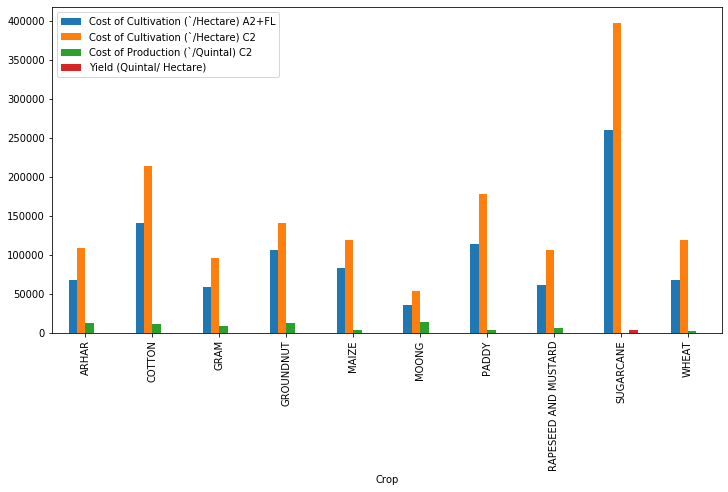

In [45]:
df.groupby(["Crop"]).sum().plot(kind="bar",figsize=(12,6))

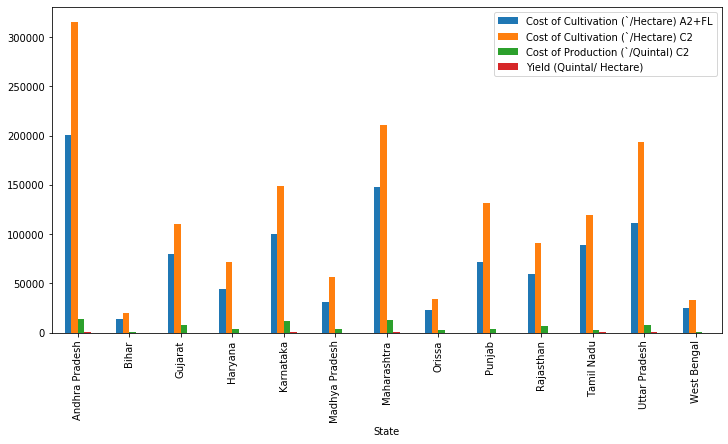

In [68]:
df.groupby(["State"]).sum().plot(kind="bar",figsize=(12,6))

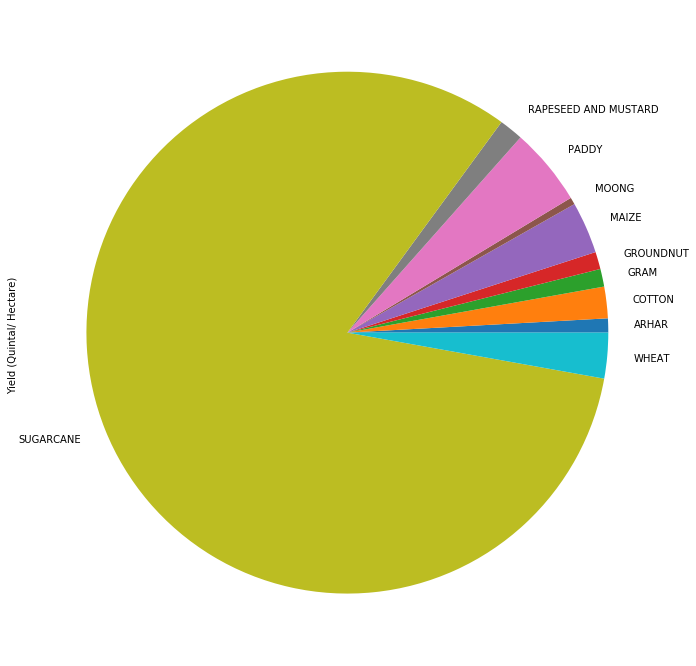

In [69]:
## Crop-wise Yield (Quintal/ Hectare)
df.groupby("Crop")[cols[-1]].sum().plot(kind="pie",figsize=(12,12))

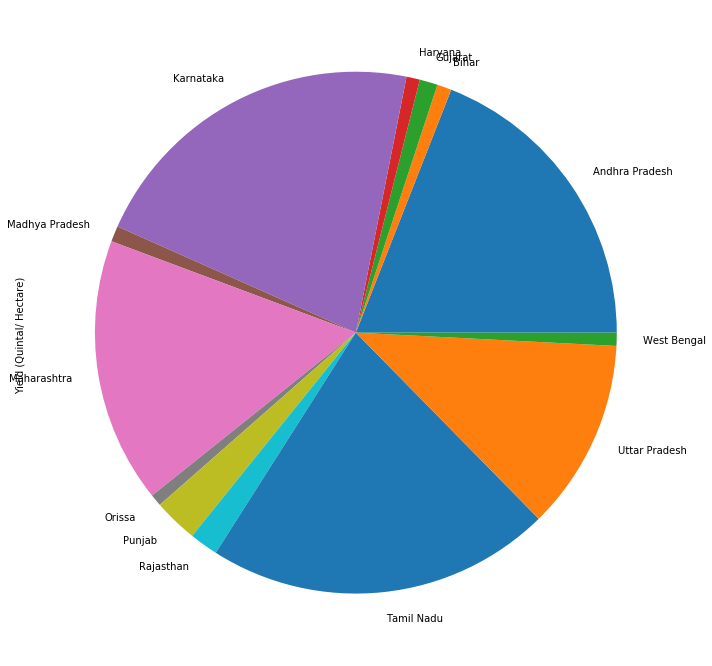

In [70]:
## State-wise Yield (Quintal/ Hectare)
df.groupby("State")[cols[-1]].sum().plot(kind="pie",figsize=(12,12))

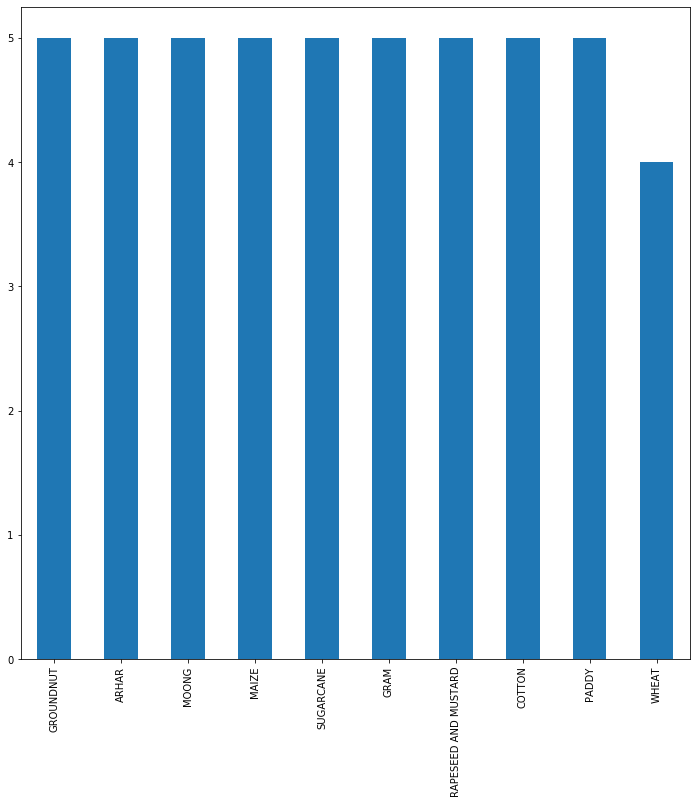

In [71]:
## Number of varieties per crop
df["Crop"].value_counts().plot(kind="bar",figsize= (12,12))